In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [ ]:
point_loma = pd.read_csv('/Users/elizabethmurphy/Downloads/PointLoma_sewage_qPCR.csv', parse_dates=["Sample_Date"],)
south_bay = pd.read_csv('/Users/elizabethmurphy/Downloads/SouthBay_sewage_qPCR.csv', parse_dates=["Sample_Date"])
encina = pd.read_csv('/Users/elizabethmurphy/Downloads/Encina_sewage_qPCR.csv', parse_dates=["Sample_Date"])

/var/folders/s2/nry612l527j2xxdsq0_70h6m0000gn/T/ipykernel_97495/2765452027.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  point_loma = pd.read_csv('/Users/elizabethmurphy/Downloads/PointLoma_sewage_qPCR.csv', parse_dates=["Sample_Date"],)
/var/folders/s2/nry612l527j2xxdsq0_70h6m0000gn/T/ipykernel_97495/2765452027.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  south_bay = pd.read_csv('/Users/elizabethmurphy/Downloads/SouthBay_sewage_qPCR.csv', parse_dates=["Sample_Date"])
/var/folders/s2/nry612l527j2xxdsq0_70h6m0000gn/T/ipykernel_97495/2765452027.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-ex

In [ ]:
point_loma["Sewershed"] = "Point Loma"
south_bay["Sewershed"] = "South Bay"
encina["Sewershed"] = "Encina"

# Combine datasets
data = pd.concat([point_loma, south_bay, encina])
data.head()

,Sample_Date,Mean viral gene copies/L,Sewershed
0,2021-02-24,681730,Point Loma
1,2021-02-28,943877,Point Loma
2,2021-03-01,1034196,Point Loma
3,2021-03-03,1918221,Point Loma
4,2021-03-07,770022,Point Loma


In [5]:
data['Year'] = data['Sample_Date'].dt.year

# Data summary
summary = data.groupby(["Sewershed", "Year"])["Mean viral gene copies/L"].agg(
    mean_load="mean",
    median_load="median",
    max_load="max",
    sd_load="std",
    n="count"
).reset_index()

print(summary)

     Sewershed  Year     mean_load  median_load  max_load       sd_load    n
0       Encina  2022  1.784019e+06    1021150.0   8529018  1.798672e+06  145
1       Encina  2023  1.878524e+06    1065849.0  16148643  2.169495e+06  219
2       Encina  2024  3.274367e+06    2606218.0  12454677  2.141725e+06  227
3       Encina  2025  2.539540e+06    2168512.0   6390645  1.344258e+06   47
4   Point Loma  2021  1.617528e+06     872040.0  18529018  2.514755e+06  123
5   Point Loma  2022  8.292653e+06    5933056.0  47626166  9.082667e+06  170
6   Point Loma  2023  3.698345e+06    2200703.0  17212562  3.216536e+06  185
7   Point Loma  2024  5.456447e+06    4820323.0  17200872  3.075728e+06  183
8   Point Loma  2025  4.470667e+06    4015649.5   9934167  1.850131e+06   34
9    South Bay  2022  9.547809e+05     727987.0   4361033  8.385668e+05  106
10   South Bay  2023  6.440239e+05     402936.0   4071696  7.051001e+05  127
11   South Bay  2024  1.022267e+06     872499.5   5844002  7.789769e+05  136

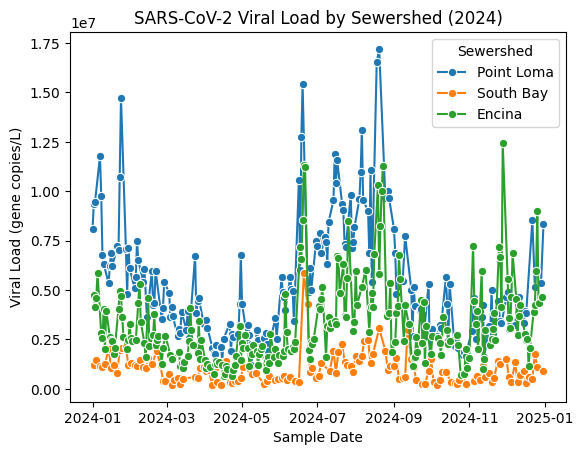

In [6]:
# 2024 (all sewersheds)
mask_2024 = (data["Sample_Date"] >= "2024-01-01") & (data["Sample_Date"] <= "2024-12-31")
data_2024 = data.loc[mask_2024]

sns.lineplot(data=data_2024, x="Sample_Date", y="Mean viral gene copies/L", hue="Sewershed", marker="o")
plt.title("SARS-CoV-2 Viral Load by Sewershed (2024)")
plt.xlabel("Sample Date")
plt.ylabel("Viral Load (gene copies/L)")
plt.legend(title="Sewershed")
plt.show()

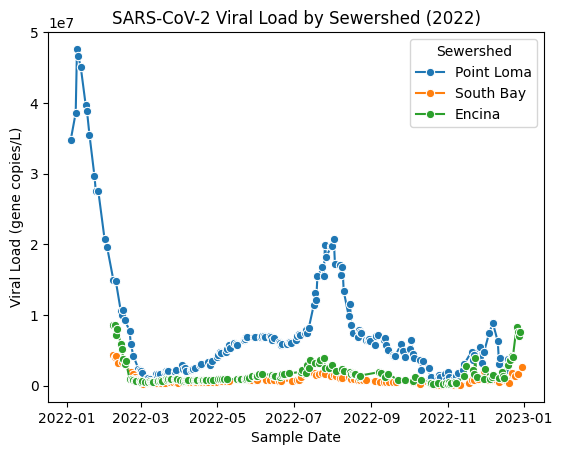

In [7]:
# 2022 (all sewersheds)
mask_2022 = (data["Sample_Date"] >= "2022-01-01") & (data["Sample_Date"] <= "2022-12-31")
data_2022 = data.loc[mask_2022]

sns.lineplot(data=data_2022, x="Sample_Date", y="Mean viral gene copies/L", hue="Sewershed", marker="o")
plt.title("SARS-CoV-2 Viral Load by Sewershed (2022)")
plt.xlabel("Sample Date")
plt.ylabel("Viral Load (gene copies/L)")
plt.legend(title="Sewershed")
plt.show()

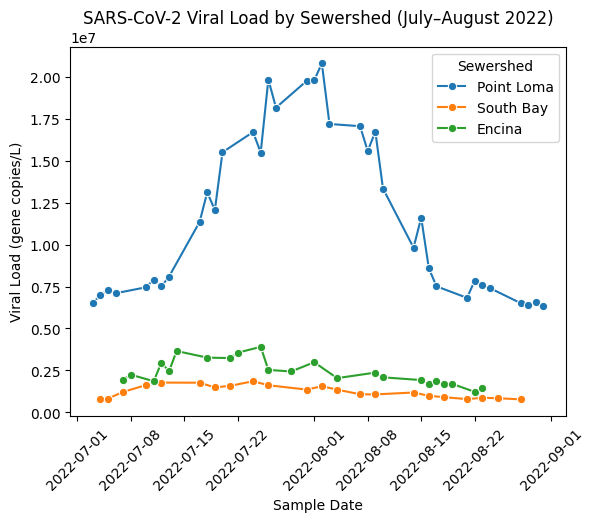

In [8]:
# July–August 2022 (all sewersheds)
julyaugust = (data["Sample_Date"] >= "2022-07-01") & (data["Sample_Date"] <= "2022-08-31")
data_ja = data.loc[julyaugust]

sns.lineplot(data=data_ja, x="Sample_Date", y="Mean viral gene copies/L", hue="Sewershed", marker="o")
plt.title("SARS-CoV-2 Viral Load by Sewershed (July–August 2022)")
plt.xlabel("Sample Date")
plt.ylabel("Viral Load (gene copies/L)")
plt.legend(title="Sewershed")
plt.xticks(rotation=45)
plt.show()

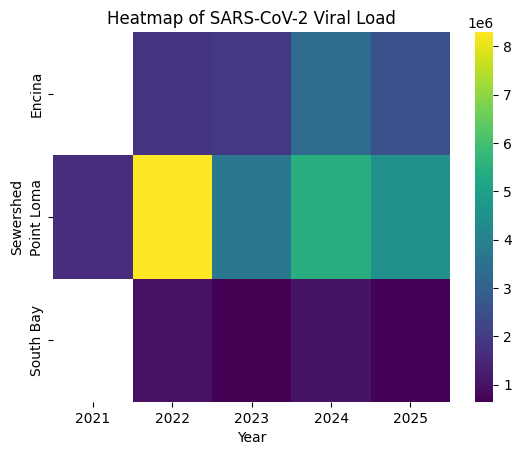

In [ ]:
# Heatmap
pivot = data.pivot_table(index='Year', columns='Sewershed', values='Mean viral gene copies/L')
sns.heatmap(pivot.T, cmap='viridis')
plt.title('Heatmap of SARS-CoV-2 Viral Load')
plt.xlabel('Year')
plt.ylabel('Sewershed')
plt.show()

Point Loma experienced very high viral loads in 2022, followed by slightly lower but still elevated levels in 2023–2025. Encina had moderate viral loads, with a peak around 2024, but never as high as Point Loma. South Bay consistently showed very low viral loads across all years.

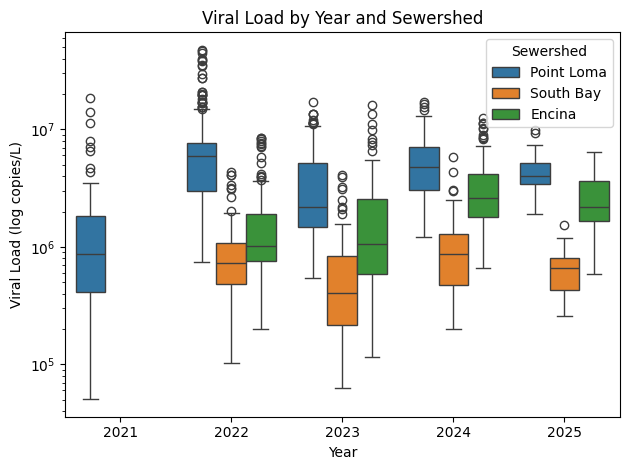

In [ ]:
# Boxplot by Year and Sewershed
sns.boxplot(data=data, x='Year', y='Mean viral gene copies/L', hue='Sewershed')
plt.title('Viral Load by Year and Sewershed')
plt.yscale('log')
plt.ylabel('Viral Load (log copies/L)')
plt.tight_layout()
plt.show()